In [2]:
import math
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import callbacks


# Read File

In [3]:
df = pd.read_csv(r"C:\Users\OMEN\Downloads\Adi\Jurnal\GGRM.JK.csv")


In [4]:
df['Date']= pd.to_datetime(df['Date'])

In [5]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [6]:
df = df.dropna(how='any',axis=0)

In [7]:
# Total data

df.shape

(4750, 7)

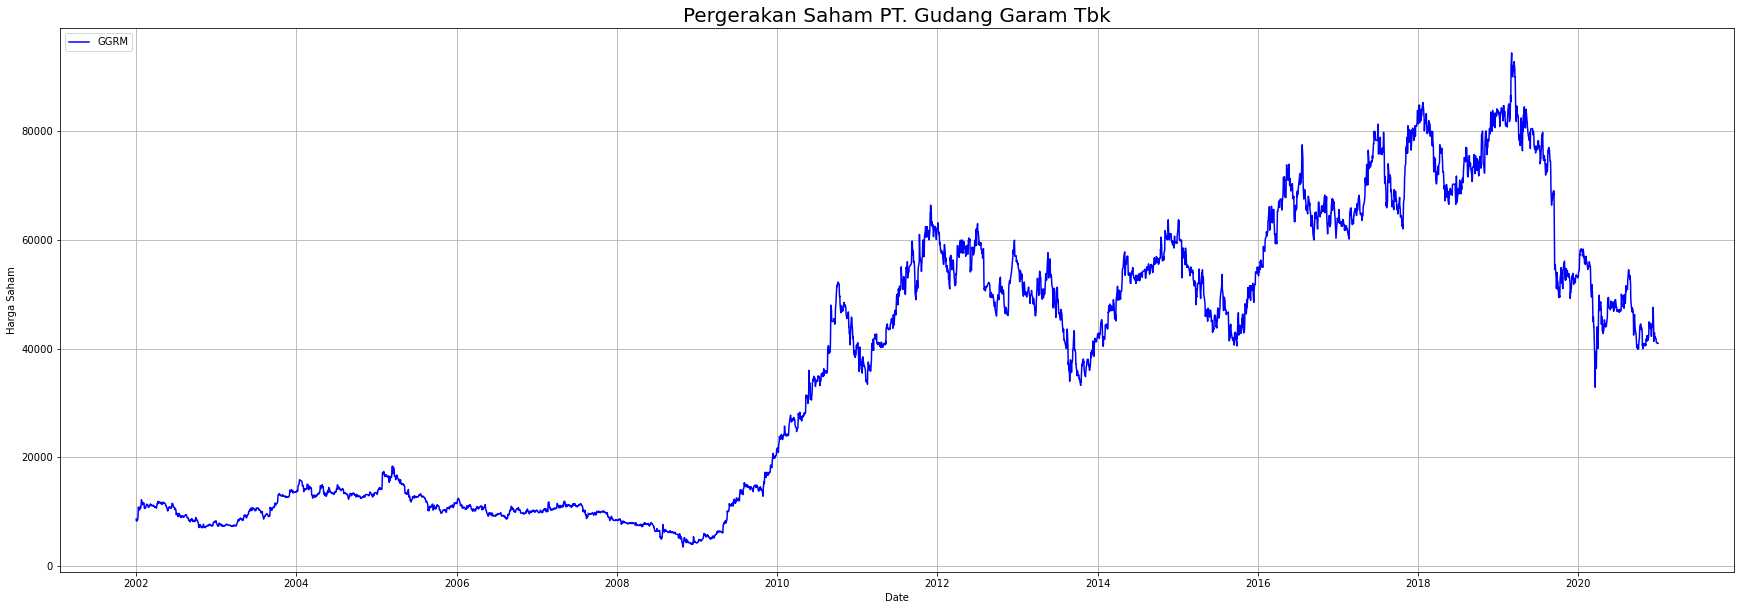

In [8]:
plt.title("Pergerakan Saham PT. Gudang Garam Tbk",fontsize=20)
plt.plot(df['Date'],df['Close'],color='blue', label='GGRM')
plt.xlabel('Date')
plt.ylabel('Harga Saham')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(30, 10)
#fig.savefig('plotGGRM.png', dpi=300)
plt.grid()
plt.show()

In [9]:
df_train = df
#df_val = df[3501:4500]


In [10]:
T_temp  = df_train['Close'].values

In [11]:
T_temp = np.array(T_temp)
T_temp = np.reshape(T_temp, (len(T_temp), 1))

In [12]:
T_temp.shape

(4750, 1)

# Mengambil 80% data dari dataset

In [13]:

trainingLength = math.ceil(len(T_temp)*0.8)

trainingLength

3800

In [14]:
scaler = MinMaxScaler()


scaler.fit(T_temp[0:trainingLength, :])
scaled_data = scaler.transform(T_temp)


scaled_data

array([[0.06959459],
       [0.06486486],
       [0.06486486],
       ...,
       [0.50709459],
       [0.50777027],
       [0.50675676]])

In [15]:
train_data = scaled_data[0:3850, :]

Xtrain = []
Ytrain = []

for i in range(50, len(train_data)):
  Xtrain.append(train_data[i-50:i, 0])
  Ytrain.append(train_data[i, 0])

In [16]:
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)

In [17]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtrain = np.asarray(Xtrain).astype('float32')


In [18]:
Xtrain.shape

(3800, 50, 1)

In [19]:
Xtrain[0]

array([[0.06959459],
       [0.06486487],
       [0.06486487],
       [0.06486487],
       [0.06689189],
       [0.06891892],
       [0.07432432],
       [0.08378378],
       [0.09932432],
       [0.0945946 ],
       [0.0945946 ],
       [0.09189189],
       [0.09527027],
       [0.1       ],
       [0.09594595],
       [0.09932432],
       [0.1       ],
       [0.11148649],
       [0.11756757],
       [0.11216217],
       [0.11013514],
       [0.10540541],
       [0.10540541],
       [0.10945946],
       [0.10945946],
       [0.11013514],
       [0.10743243],
       [0.0972973 ],
       [0.09594595],
       [0.09662163],
       [0.09662163],
       [0.09797297],
       [0.09864864],
       [0.1027027 ],
       [0.10675675],
       [0.10608108],
       [0.10472973],
       [0.10540541],
       [0.10540541],
       [0.10135135],
       [0.09864864],
       [0.10067567],
       [0.10067567],
       [0.1       ],
       [0.1027027 ],
       [0.10472973],
       [0.10675675],
       [0.107

In [20]:
input_shape=(Xtrain.shape[1], 1)

In [21]:
input_shape

(50, 1)

In [22]:
"""earlystopping = callbacks.EarlyStopping(monitor ="root_mean_squared_error", 
                                        mode ="min", patience = 30, 
                                        restore_best_weights = True)

"""
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('root_mean_squared_error')<=0.0088):
        print("\nTelah mencapai accuracy sebesar >97% hentikan training!")
        self.model.stop_training = True
callbacks = myCallback()

In [23]:
model = models.Sequential()
units = 64
model.add(layers.LSTM(units, return_sequences=True,
                      input_shape= (Xtrain.shape[1], 1)))
model.add(layers.LSTM(units, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [24]:
#model.compile(optimizer='adam', loss='mse')

model.compile(loss=tf.keras.losses.Huber(),
              optimizer='adam',              
              metrics=tf.keras.metrics.RootMeanSquaredError())


In [25]:
history_data = model.fit(Xtrain, Ytrain,
                         batch_size=32,
                         epochs=100,
                         #verbose=2,
                         validation_split=0.2)

Epoch 1/100
95/95 [==============================] - 5s 15ms/step - loss: 0.0098 - root_mean_squared_error: 0.1270 - val_loss: 4.2843e-04 - val_root_mean_squared_error: 0.0293
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 1.9100e-04 - root_mean_squared_error: 0.0195 - val_loss: 4.8328e-04 - val_root_mean_squared_error: 0.0311
Epoch 3/100
95/95 [==============================] - 1s 9ms/step - loss: 1.7445e-04 - root_mean_squared_error: 0.0187 - val_loss: 3.9832e-04 - val_root_mean_squared_error: 0.0282
Epoch 4/100
95/95 [==============================] - 1s 9ms/step - loss: 1.8937e-04 - root_mean_squared_error: 0.0194 - val_loss: 9.0375e-04 - val_root_mean_squared_error: 0.0425
Epoch 5/100
95/95 [==============================] - 1s 10ms/step - loss: 2.0240e-04 - root_mean_squared_error: 0.0200 - val_loss: 4.1849e-04 - val_root_mean_squared_error: 0.0289
Epoch 6/100
95/95 [==============================] - 1s 9ms/step - loss: 1.5417e-04 - root_mean_squared_err

Epoch 46/100
95/95 [==============================] - 1s 9ms/step - loss: 4.3071e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.2646e-04 - val_root_mean_squared_error: 0.0159
Epoch 47/100
95/95 [==============================] - 1s 10ms/step - loss: 5.0313e-05 - root_mean_squared_error: 0.0100 - val_loss: 1.4518e-04 - val_root_mean_squared_error: 0.0170
Epoch 48/100
95/95 [==============================] - 1s 9ms/step - loss: 4.3895e-05 - root_mean_squared_error: 0.0093 - val_loss: 1.4277e-04 - val_root_mean_squared_error: 0.0169
Epoch 49/100
95/95 [==============================] - 1s 10ms/step - loss: 6.0669e-05 - root_mean_squared_error: 0.0110 - val_loss: 1.3011e-04 - val_root_mean_squared_error: 0.0161
Epoch 50/100
95/95 [==============================] - 1s 9ms/step - loss: 4.7357e-05 - root_mean_squared_error: 0.0097 - val_loss: 1.6739e-04 - val_root_mean_squared_error: 0.0183
Epoch 51/100
95/95 [==============================] - 1s 9ms/step - loss: 4.9757e-05 - root_mean_s

95/95 [==============================] - 1s 10ms/step - loss: 3.7372e-05 - root_mean_squared_error: 0.0086 - val_loss: 1.4386e-04 - val_root_mean_squared_error: 0.0170
Epoch 92/100
95/95 [==============================] - 1s 10ms/step - loss: 4.8854e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.6126e-04 - val_root_mean_squared_error: 0.0180
Epoch 93/100
95/95 [==============================] - 1s 9ms/step - loss: 4.9292e-05 - root_mean_squared_error: 0.0099 - val_loss: 1.5900e-04 - val_root_mean_squared_error: 0.0178
Epoch 94/100
95/95 [==============================] - 1s 9ms/step - loss: 4.6631e-05 - root_mean_squared_error: 0.0096 - val_loss: 1.4420e-04 - val_root_mean_squared_error: 0.0170
Epoch 95/100
95/95 [==============================] - 1s 9ms/step - loss: 4.1178e-05 - root_mean_squared_error: 0.0091 - val_loss: 1.6728e-04 - val_root_mean_squared_error: 0.0183
Epoch 96/100
95/95 [==============================] - 1s 9ms/step - loss: 4.1949e-05 - root_mean_squared_error:

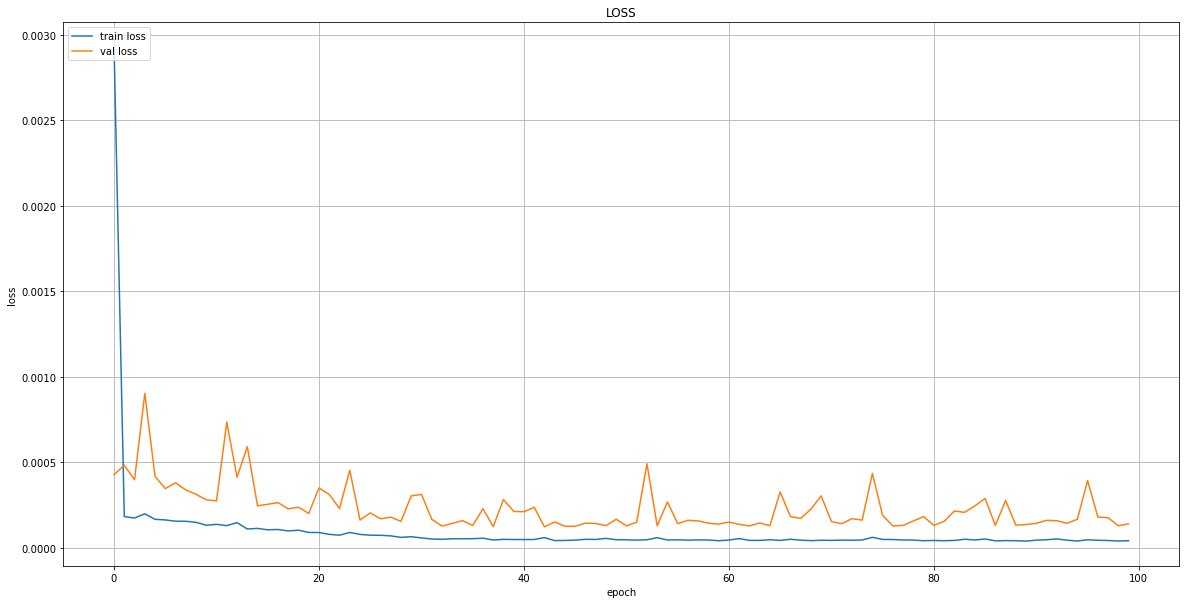

In [26]:

# plot of mae
plt.plot(history_data.history['loss'])
plt.plot(history_data.history['val_loss'])
plt.title('LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'val loss'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.grid()
plt.show()

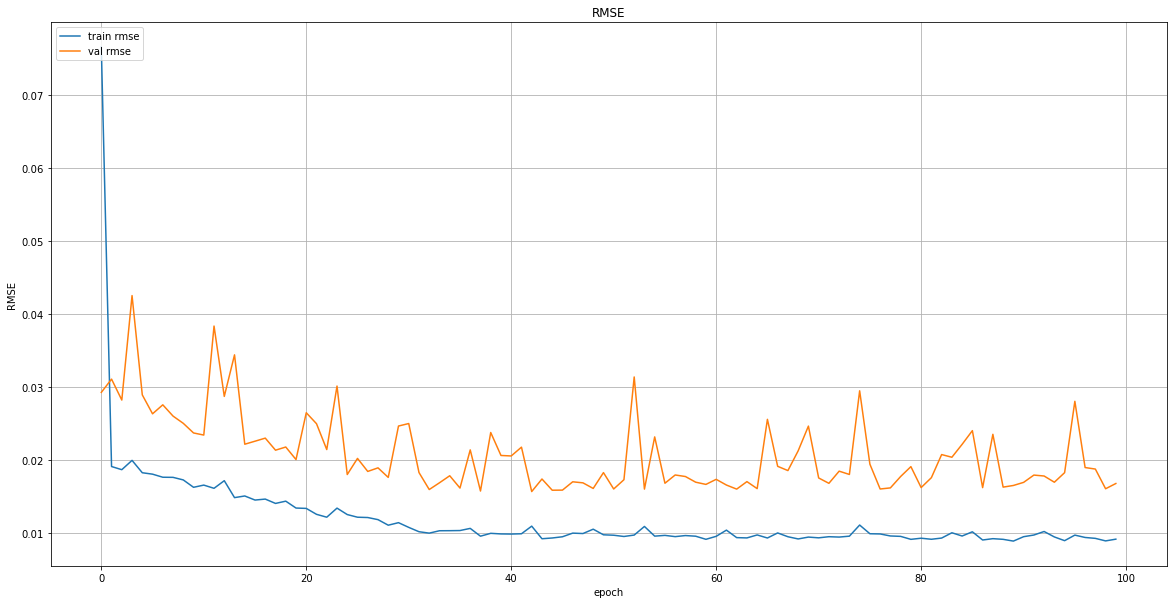

In [27]:

# plot of rmse
plt.plot(history_data.history['root_mean_squared_error'])
plt.plot(history_data.history['val_root_mean_squared_error'])
plt.title('RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train rmse', 'val rmse'], loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.grid()

plt.show()

In [28]:
new_df = df.tail(900)


In [29]:
test_data = scaled_data[trainingLength: , :]

Xtest = []
Xtest_scaled = []
Ytest = []
for i in range(50, len(test_data)):
    Xtest.append(test_data[i-50:i, 0])
    #Xtest_scaled.append(test_data[i])
    Ytest.append(test_data[i])
    


In [30]:
new_df['scaled test']= np.array(Ytest)

C:\Users\OMEN\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
Xtest = np.array(Xtest)
Ytest = np.array(Ytest)

In [32]:
Xtest = np.reshape(Xtest, (Xtest.shape[0],Xtest.shape[1], 1))


In [33]:
Xtest.shape

(900, 50, 1)

In [34]:
predictions = model.predict(Xtest)
predictions_ori = predictions
predictions = scaler.inverse_transform(predictions)
len(predictions)

900

In [35]:
Ytest

array([[1.03243243],
       [1.02567568],
       [1.01216216],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.05135135],
       [1.01351351],
       [0.97702703],
       [1.00506757],
       [0.98445946],
       [0.98648649],
       [0.97736486],
       [1.00945946],
       [1.01891892],
       [0.98175676],
       [0.97702703],
       [0.98986486],
       [0.98175676],
       [0.98310811],
       [0.97567568],
       [0.99256757],
       [0.98817568],
       [0.98108108],
       [1.00675676],
       [1.03108108],
       [0.98108108],
       [0.92939189],
       [0.90405405],
       [0.91351351],
       [0.92094595],
       [0.89189189],
       [0.88243243],
       [0.84864865],
       [0.85675676],
       [0.84324324],
       [0.85540541],
       [0.8625    ],
       [0.91148649],
       [0.91148649],
       [0.9527027 ],
       [0.92972973],
       [0.90540541],
       [0.913

In [36]:
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(Ytest,predictions_ori)
rmse.result().numpy()

0.0270414

In [37]:
Ytest

array([[1.03243243],
       [1.02567568],
       [1.01216216],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.01081081],
       [1.05135135],
       [1.01351351],
       [0.97702703],
       [1.00506757],
       [0.98445946],
       [0.98648649],
       [0.97736486],
       [1.00945946],
       [1.01891892],
       [0.98175676],
       [0.97702703],
       [0.98986486],
       [0.98175676],
       [0.98310811],
       [0.97567568],
       [0.99256757],
       [0.98817568],
       [0.98108108],
       [1.00675676],
       [1.03108108],
       [0.98108108],
       [0.92939189],
       [0.90405405],
       [0.91351351],
       [0.92094595],
       [0.89189189],
       [0.88243243],
       [0.84864865],
       [0.85675676],
       [0.84324324],
       [0.85540541],
       [0.8625    ],
       [0.91148649],
       [0.91148649],
       [0.9527027 ],
       [0.92972973],
       [0.90540541],
       [0.913

In [38]:
model.evaluate(Xtest,Ytest)

29/29 [==============================] - 1s 6ms/step - loss: 3.6562e-04 - root_mean_squared_error: 0.0270


[0.0003656187036540359, 0.027041401714086533]

C:\Users\OMEN\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


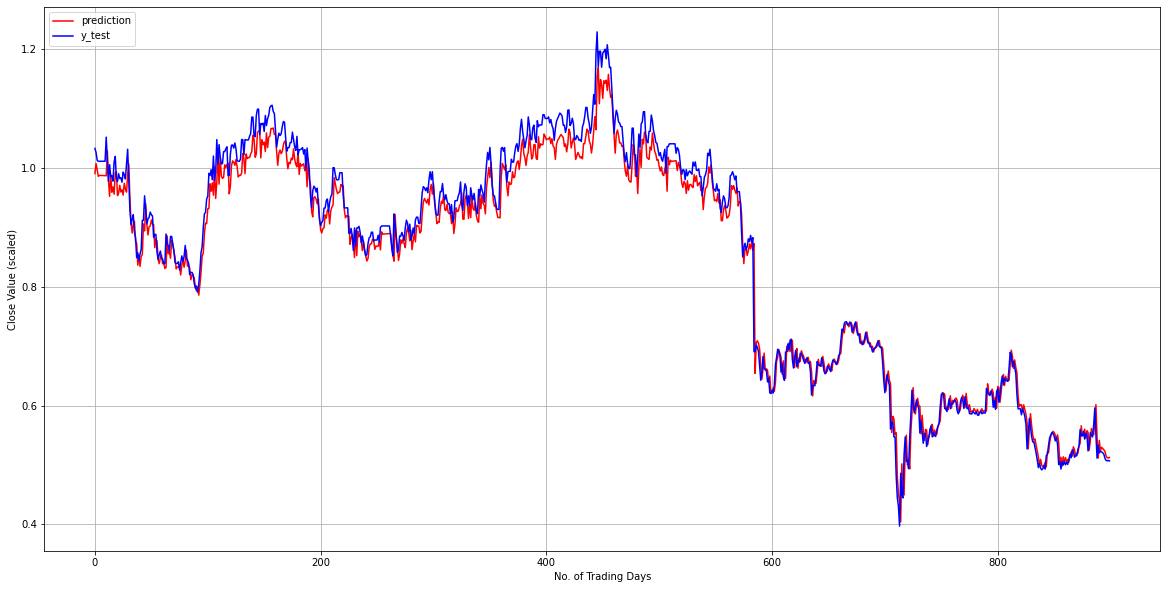

In [39]:

new_df['Predictions_scaled'] = predictions_ori


plt.plot(predictions_ori,color='red', label='prediction')
plt.plot(Ytest,color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20, 10)
#fig.savefig('img/25/mrftestcnn.png', dpi=300)
plt.grid()
plt.show()

In [40]:
new_df[['Date','Predictions_scaled','scaled test']]


,Date,Predictions_scaled,scaled test
3851,2017-06-19,0.990231,1.032432
3852,2017-06-20,1.007064,1.025676
3853,2017-06-21,0.996665,1.012162
3854,2017-06-22,0.985454,1.010811
3855,2017-06-23,0.987022,1.010811
...,...,...,...
4747,2020-12-22,0.522919,0.511149
4748,2020-12-23,0.515156,0.507770
4749,2020-12-28,0.512290,0.507095
4750,2020-12-29,0.511841,0.507770
